In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

2024-05-31 17:33:53.508813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 17:33:54.313926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class Autoencoder(tf.keras.Model):
    def __init__(self, dimensions=[784,512,256,64]):
        super(Autoencoder, self).__init__()
        self.encoder_layers = []
        self.decoder_layers = []
        
        # build the encoder
        for i in range(len(dimensions)-1):
            self.encoder_layers.append(
                tf.keras.layers.Dense(dimensions[i-1], activation='tanh', 
                                      kernel_initializer=tf.keras.initializers.RandomUniform(
                                          minval=-1.0/math.sqrt(dimensions[i]),
                                          maxval=1.0/math.sqrt(dimensions[i])
                                      ))
            )
            
            
        # build the decoder
        for i in range(len(dimensions)-1, 0, -1):
            self.decoder_layers.append(
                tf.keras.layers.Dense(dimensions[i-1], activation='tanh',
                                     kernel_initializer=tf.keras.initializers.RandomUniform(
                                         minval= -1.0/math.sqrt(dimensions[i]),
                                         maxval= 1.0/math.sqrt(dimensions[i])
                                     ))
            )
        
    def call(self, x):
        for layer in self.encoder_layers:
            x = layer(x)
            
        z = x  # latent representation
            
        for layer in self.decoder_layers:
            x = layer(x)
                
        return x

In [3]:
def preprocess(x):
    x = x.astype('float32') / 255.0
    x = x.reshape((x.shape[0], -1))
    return x

In [4]:
def test_mnist():
    # load and preprocess MNIST data
    (x_train, _), (x_test, _) = mnist.load_data()
    x_train = preprocess(x_train)
    x_test = preprocess(x_test)
    mean_img = np.mean(x_train, axis=0)
    x_train -= mean_img
    x_test -= mean_img
    
    # build and compile the autoencoder
    autoencoder = Autoencoder(dimensions=[784, 256, 64])
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    
    autoencoder.fit(x_train, x_train, epochs=10, batch_size=50, validation_data=(x_test, x_test))
    
    # test the auto encoder
    n_examples = 15
    test_xs = x_test[:n_examples]
    recon = autoencoder.predict(test_xs)
    
    # plot the example reconstruction
    fig, axs = plt.subplots(2, n_examples, figsize=(10,2))
    
    for example_i in range(n_examples):
        axs[0][example_i].imshow(np.reshape(test_xs[example_i, :] + mean_img, (28,28)), cmap='gray')
        axs[1][example_i].imshow(np.reshape(recon[example_i, :] + mean_img, (28,28)), cmap='gray')
        
    plt.show()

2024-05-31 17:33:59.116412: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-31 17:33:59.116442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: davinci-Precision-3541
2024-05-31 17:33:59.116447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: davinci-Precision-3541
2024-05-31 17:33:59.116517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.146.2
2024-05-31 17:33:59.116533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.146.2
2024-05-31 17:33:59.116537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.146.2


Epoch 1/10
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0121 - val_loss: 0.0095
Epoch 2/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 3/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 4/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 5/10
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 6/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 7/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 8/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 9/10
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 10/10
1/1 [==============================] - 0s 63ms/step


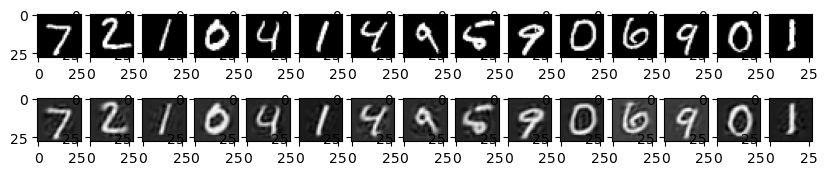

In [5]:
if __name__ == '__main__':
    test_mnist()